<a href="https://colab.research.google.com/github/yuanquan0726/5000-lab-1.2/blob/main/2_scripts/p_Quan_scripts/demo_result_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd

def load_and_preprocess_data(folder_path, max_samples=None):
    """
    Load and preprocess tweet data from multiple CSV files.

    Args:
        folder_path (str): Path to the folder containing CSV files.
        max_samples (int, optional): Maximum number of samples to use.

    Returns:
        pd.DataFrame: DataFrame containing processed tweets, candidate IDs, and party labels.
    """
    all_data = []  # Store all tweet records

    # Iterate through all CSV files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            file_path = os.path.join(folder_path, filename)
            print(f"\nLoading file: {filename}")

            try:
                # Load the CSV file
                df = pd.read_csv(file_path, encoding='latin1', low_memory=False)

                # Ensure required columns exist
                if 'tweet' not in df or 'candStem' not in df:
                    print(f"Skipping {filename}: Missing required columns.")
                    continue  # Skip files without necessary columns

                # Assign "party" if missing
                if 'party' not in df:
                    df['party'] = "D"  # Default to Democrat if no party column

                # Keep only necessary columns
                df = df[['tweet', 'candStem', 'party']].dropna()

                # Convert types to ensure consistency
                df['tweet'] = df['tweet'].astype(str)
                df['candStem'] = df['candStem'].astype(str)
                df['party'] = df['party'].astype(str)

                # Append cleaned data
                all_data.append(df)

            except Exception as e:
                print(f"Error reading {filename}: {str(e)}")

    # Merge all data into a single DataFrame
    df_tweets = pd.concat(all_data, ignore_index=True)

    # If max_samples is specified, randomly sample the data
    if max_samples and max_samples < len(df_tweets):
        df_tweets = df_tweets.sample(n=max_samples, random_state=42).reset_index(drop=True)
        print(f"\nRandomly sampled {max_samples} examples from total dataset.")

    print(f"\nFinal dataset size: {len(df_tweets)}")

    return df_tweets

# Set paths
folder_path = '/content/drive/MyDrive/tweet/tweet_lable'

# Load data
df_tweets_2020 = load_and_preprocess_data(folder_path, max_samples=None)




Loading file: Official_01_2021.csv

Loading file: Official_03_2021.csv

Loading file: Official_11_2021.csv

Loading file: Official_07_2021.csv

Loading file: Official_02_2021.csv

Loading file: Presidential_01_2021.csv

Loading file: Official_05_2021.csv

Loading file: Campaign_09_2021.csv

Loading file: Official_08_2021.csv

Loading file: Campaign_05_2021.csv

Loading file: Campaign_01_2021.csv

Loading file: Official_04_2021.csv

Loading file: Campaign_12_2021.csv

Loading file: Campaign_02_2021.csv

Loading file: Official_12_2021.csv

Loading file: Campaign_06_2021.csv

Loading file: Campaign_02_2022.csv

Loading file: Campaign_04_2021.csv

Loading file: Official_10_2021.csv

Loading file: Official_09_2021.csv

Loading file: Campaign_10_2021.csv

Loading file: Presidential_03_2021.csv

Loading file: Campaign_11_2021.csv

Loading file: Official_06_2021.csv

Loading file: Campaign_07_2021.csv

Loading file: Campaign_03_2021.csv

Loading file: Campaign_08_2021.csv

Loading file: Campa

In [4]:
len(df_tweets_2020['candStem'].unique())

3076

In [5]:
df_demo = df_tweets_2020[df_tweets_2020['party'].isin(['D'])]
df_demo

,tweet,candStem,party
0,Congresswoman Jackson Lee opens her 53rd COVID...,TX-18-jacksonlee_sheila-,D
1,"3/3 Every time we met, she exuded love, and ou...",TX-18-jacksonlee_sheila-,D
2,2/3 She showed real passion and brought light ...,TX-18-jacksonlee_sheila-,D
3,"1/3 Cicely Tyson, one of a kind, a black woman...",TX-18-jacksonlee_sheila-,D
4,//t.co/DJ1lqghIZb,TX-18-jacksonlee_sheila-,D
...,...,...,...
3013117,"@oddballquilter Oddball, You actually saved it...",AL-Gov-flowers_yolanda-,D
3013118,@oddballquilter I didn't call us none humans. ...,AL-Gov-flowers_yolanda-,D
3013119,@JustinEGiboney His truth shall make us free!!...,AL-Gov-flowers_yolanda-,D
3013120,"@JustinEGiboney You're so right about that, Br...",AL-Gov-flowers_yolanda-,D


In [6]:
df_tweets_2020

,tweet,candStem,party
0,Congresswoman Jackson Lee opens her 53rd COVID...,TX-18-jacksonlee_sheila-,D
1,"3/3 Every time we met, she exuded love, and ou...",TX-18-jacksonlee_sheila-,D
2,2/3 She showed real passion and brought light ...,TX-18-jacksonlee_sheila-,D
3,"1/3 Cicely Tyson, one of a kind, a black woman...",TX-18-jacksonlee_sheila-,D
4,//t.co/DJ1lqghIZb,TX-18-jacksonlee_sheila-,D
...,...,...,...
3013117,"@oddballquilter Oddball, You actually saved it...",AL-Gov-flowers_yolanda-,D
3013118,@oddballquilter I didn't call us none humans. ...,AL-Gov-flowers_yolanda-,D
3013119,@JustinEGiboney His truth shall make us free!!...,AL-Gov-flowers_yolanda-,D
3013120,"@JustinEGiboney You're so right about that, Br...",AL-Gov-flowers_yolanda-,D


In [19]:
print(df_tweets_2020['party'].unique())

['D' 'I' 'R' nan]


In [5]:
print(df_demo['candStem'].unique())

['INFL-aliciagarza' 'INFL-BarackObama' 'INFL-Blklivesmatter'
 'INFL-briebriejoy' 'INFL-deray' 'INFL-GreenPartyUS' 'INFL-GretaThunberg'
 'INFL-HillaryClinton' 'INFL-JoeBiden' 'INFL-jordanuhl' 'INFL-joyannreid'
 'INFL-kenklippenstein' 'INFL-KyleKulinski' 'INFL-maddow'
 'INFL-mehdirhasan' 'INFL-MichelleObama' 'INFL-MSNBC' 'INFL-mspackyetti'
 'INFL-PeteButtigieg' 'INFL-votevets' 'INFL-zerlinamaxwell'
 'INFL-cmclymer' 'INFL-cthagod' 'INFL-donnabrazile' 'INFL-ezraklein'
 'INFL-jonfavs' 'INFL-kdrum' 'INFL-LarrySabato' 'INFL-markos'
 'INFL-stevebenen' 'INFL-TheRevAl' 'INFL-TomSteyer' 'INFL-jonathanchait'
 'INFL-newdemcoalition' 'INFL-thewelcomepac' 'INFL-thirdwaytweet'
 'WV-Gov-salango_ben-' 'MT-Gov-cooney_mike-' 'IN-Gov-myers_woodrow-'
 'WA-Gov-inslee_jay-' 'DE-Gov-carney_john-' 'NC-Gov-cooper_roy-'
 'MO-Gov-galloway_nicole-' 'NH-Gov-feltes_dan-' 'UT-Gov-peterson_chris-'
 'INFL-parkermolloy' 'INFL-davidsirota' 'INFL-mattbruenig']


In [7]:
len(df_demo['candStem'].unique())

48

In [10]:
import torch
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_path = "/content/drive/MyDrive/tweet/model_democrats"
model_demo = AutoModelForSequenceClassification.from_pretrained(model_path, num_labels=1)
tokenizer = AutoTokenizer.from_pretrained(model_path)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_demo.to(device)
model_demo.eval()  # Set model to evaluation mode
print(f"Model loaded on {device}")

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


Model loaded on cuda


In [11]:
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm

# Define a Dataset class for new predictions
class TweetDataset(Dataset):
    def __init__(self, texts, tokenizer, max_length=128):
        self.texts = texts
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])

        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors=None
        )

        return {
            'input_ids': torch.tensor(encoding['input_ids'], dtype=torch.long),
            'attention_mask': torch.tensor(encoding['attention_mask'], dtype=torch.long),
        }

# Define function to predict scores
def predict_scores(df, model, tokenizer, batch_size=64):
    dataset = TweetDataset(df["tweet"].tolist(), tokenizer)
    dataloader = DataLoader(dataset, batch_size=batch_size)

    predict_scores = []

    for batch in tqdm(dataloader, desc="Predicting"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)

        with torch.no_grad():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits.squeeze(-1)  # Get single-value predictions

        predict_scores.extend(logits.cpu().numpy())  # Move results to CPU

    return predict_scores

# df1 = df_demo.sample(n=300, random_state=42)  # Adjust random_state for reproducibility
# df1["predict_score"] = predict_scores(df1, model_demo, tokenizer)
# df1
# Run prediction
df_demo["predict_score"] = predict_scores(df_demo, model_demo, tokenizer)

df_demo

Predicting: 100%|██████████| 26096/26096 [3:04:38<00:00,  2.36it/s]
<ipython-input-11-1b503135b41f>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demo["predict_score"] = predict_scores(df_demo, model_demo, tokenizer)


,tweet,candStem,party,predict_score
0,Congresswoman Jackson Lee opens her 53rd COVID...,TX-18-jacksonlee_sheila-,D,-0.470433
1,"3/3 Every time we met, she exuded love, and ou...",TX-18-jacksonlee_sheila-,D,-0.551705
2,2/3 She showed real passion and brought light ...,TX-18-jacksonlee_sheila-,D,-0.555872
3,"1/3 Cicely Tyson, one of a kind, a black woman...",TX-18-jacksonlee_sheila-,D,-0.604018
4,//t.co/DJ1lqghIZb,TX-18-jacksonlee_sheila-,D,-0.462968
...,...,...,...,...
3013117,"@oddballquilter Oddball, You actually saved it...",AL-Gov-flowers_yolanda-,D,-0.467953
3013118,@oddballquilter I didn't call us none humans. ...,AL-Gov-flowers_yolanda-,D,-0.613662
3013119,@JustinEGiboney His truth shall make us free!!...,AL-Gov-flowers_yolanda-,D,-0.459970
3013120,"@JustinEGiboney You're so right about that, Br...",AL-Gov-flowers_yolanda-,D,-0.542457


In [13]:
df_demo.to_csv("predict_demo_score.csv")

In [12]:
other_info = pd.read_csv('/content/drive/MyDrive/tweet/IdealPointsAll2022_labelFish.csv')
merged_data = pd.merge(other_info[['candStem', 'idealTwitter', 'avgIdeal', 'party']], df_demo, on='candStem')
merge_data = merged_data.drop(columns=['party_x'])
merged_data = merged_data.rename(columns={'party_y': 'party'})
merged_data

,candStem,idealTwitter,avgIdeal,party_x,tweet,party,predict_score
0,VA-07-spanberger_abigail-,-0.28,-0.27,D,Thank you to the Project on Government Oversig...,D,-0.385213
1,VA-07-spanberger_abigail-,-0.28,-0.27,D,"The bar should be far, far higher than Members...",D,-0.344715
2,VA-07-spanberger_abigail-,-0.28,-0.27,D,Seniors in long-term care settings and other v...,D,-0.382061
3,VA-07-spanberger_abigail-,-0.28,-0.27,D,Community pharmacists in Central VA could help...,D,-0.337277
4,VA-07-spanberger_abigail-,-0.28,-0.27,D,"Today, @RepMcKinley & I sent a letter to HHS u...",D,-0.400854
...,...,...,...,...,...,...,...
1398588,WI-Gov-evers_tony-,-0.58,-0.58,NaN,Join us for the 2023 Inauguration Ceremony and...,D,-0.493702
1398589,WI-Gov-evers_tony-,-0.58,-0.58,NaN,Today's the dayâthe 2023 Inaugural Ceremony ...,D,-0.495713
1398590,WI-Gov-evers_tony-,-0.58,-0.58,NaN,"Today is January 3, 2023.\n \nYou bet I'm jazz...",D,-0.495567
1398591,WI-Gov-evers_tony-,-0.58,-0.58,NaN,"Goodnight, Wisconsin. \n\nTomorrow, we kick of...",D,-0.521011


In [14]:
df_avg_nominate = merged_data.groupby("candStem", as_index=False).agg({
    "predict_score": "mean",  # Average predict_score per candidate
    "idealTwitter": "mean",
    "avgIdeal": "mean",
    "party": "first"          # Keep one party value (assuming it's consistent)
})
df_avg_nominate

,candStem,predict_score,idealTwitter,avgIdeal,party
0,AK-00-constant_christopher-,-0.459166,-1.40,-1.28,D
1,AK-00-peltola_mary-,-0.414240,-1.08,-1.02,D
2,AK-00-wool_adam-,-0.403530,-1.16,-0.94,D
3,AK-Sen03-chesbro_patricia-,-0.411599,-1.10,-1.17,D
4,AK-Sen03-taylor_ivan-,-0.434588,-1.25,-1.25,D
...,...,...,...,...,...
805,WV-02-dwyer_angela-,-0.451704,NaN,NaN,D
806,WV-02-wendell_barry-,-0.408781,-1.12,-1.18,D
807,WV-Sen01-manchin_joe-,-0.298675,-0.22,-0.22,D
808,WY-00-jensen_meghan-,-0.461590,-1.24,-0.90,D


In [18]:
df_cleaned = df_avg_nominate.dropna()

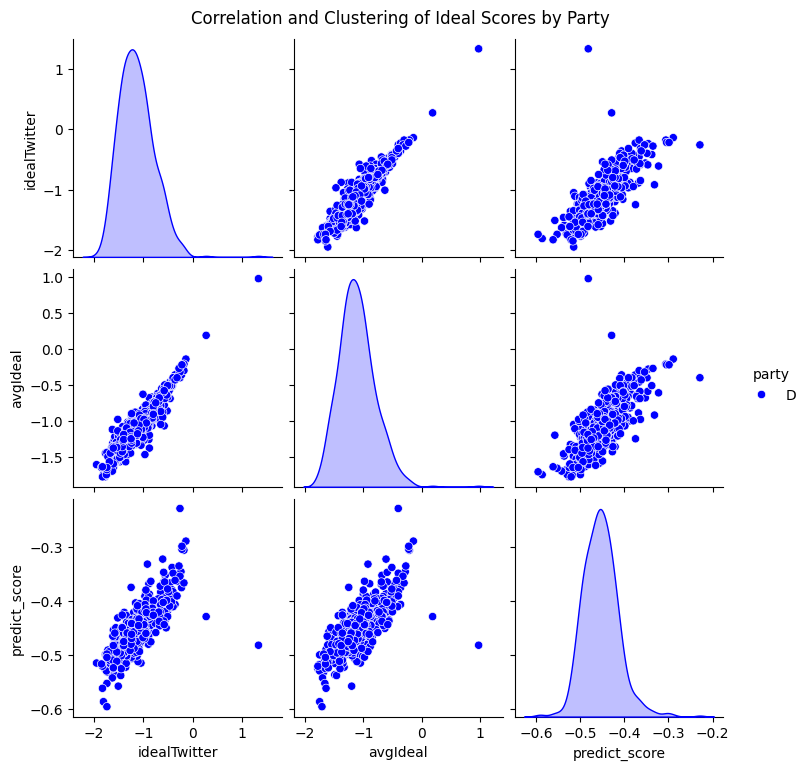

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the dataset is loaded properly
df = df_cleaned  # Assuming index_df is the dataframe shown in the image

# Define color mapping for parties
party_colors = {"D": "blue", "R": "red"}

# Create a pairplot to visualize correlations and clusters
sns.pairplot(df, vars=["idealTwitter", "avgIdeal", "predict_score",], hue="party", palette=party_colors, diag_kind="kde")

# Set plot title
plt.suptitle("Correlation and Clustering of Ideal Scores by Party", y=1.02)

# Show the plot
plt.show()

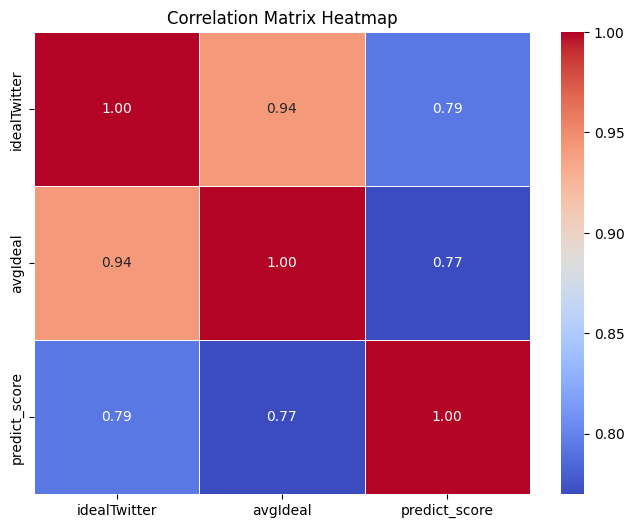

In [20]:
correlation_matrix = df_cleaned[["idealTwitter", "avgIdeal", "predict_score"]].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [21]:
nominate_score = pd.read_excel('/content/drive/MyDrive/tweet/Main_candidate_information_2022Congress.xlsx')
nominate_score = nominate_score.groupby("candStem").agg(
    average_nominate_score=("nominateAdj", "mean"))
nominate_score = nominate_score.dropna()
nominate_score

,average_nominate_score
candStem,
AK-Sen02-sullivan_dan-,0.480
AK-Sen03-murkowski_lisa-,0.210
AL-01-carl_jerry-,0.530
AL-02-moore_barry-,0.644
AL-03-rogers_mike-,0.360
...,...
WV-Sen01-manchin_joe-,-0.058
WV-Sen02-capito_shelleymoore-,0.273
WY-00-cheney_liz-,0.448


In [22]:
df_candidate_scores1 = pd.merge(nominate_score, df_cleaned, on='candStem')

df_candidate_scores1

,candStem,average_nominate_score,predict_score,idealTwitter,avgIdeal,party
0,AL-07-sewell_terri-,-0.393,-0.445075,-1.08,-1.06,D
1,AZ-02-ohalleran_tom-,-0.195,-0.228717,-0.26,-0.40,D
2,AZ-03-gallego_ruben-,-0.598,-0.432973,-1.34,-1.22,D
3,AZ-04-stanton_greg-,-0.288,-0.352476,-0.56,-0.68,D
4,AZ-07-grijalva_raul-,-0.448,-0.458600,-1.49,-1.43,D
...,...,...,...,...,...,...
229,WA-Sen03-murray_patty-,-0.352,-0.433365,-1.09,-1.06,D
230,WI-02-pocan_mark-,-0.536,-0.494526,-1.54,-1.37,D
231,WI-04-moore_gwen-,-0.527,-0.473031,-1.23,-1.15,D
232,WI-Sen01-baldwin_tammy-,-0.493,-0.458471,-0.75,-0.75,D


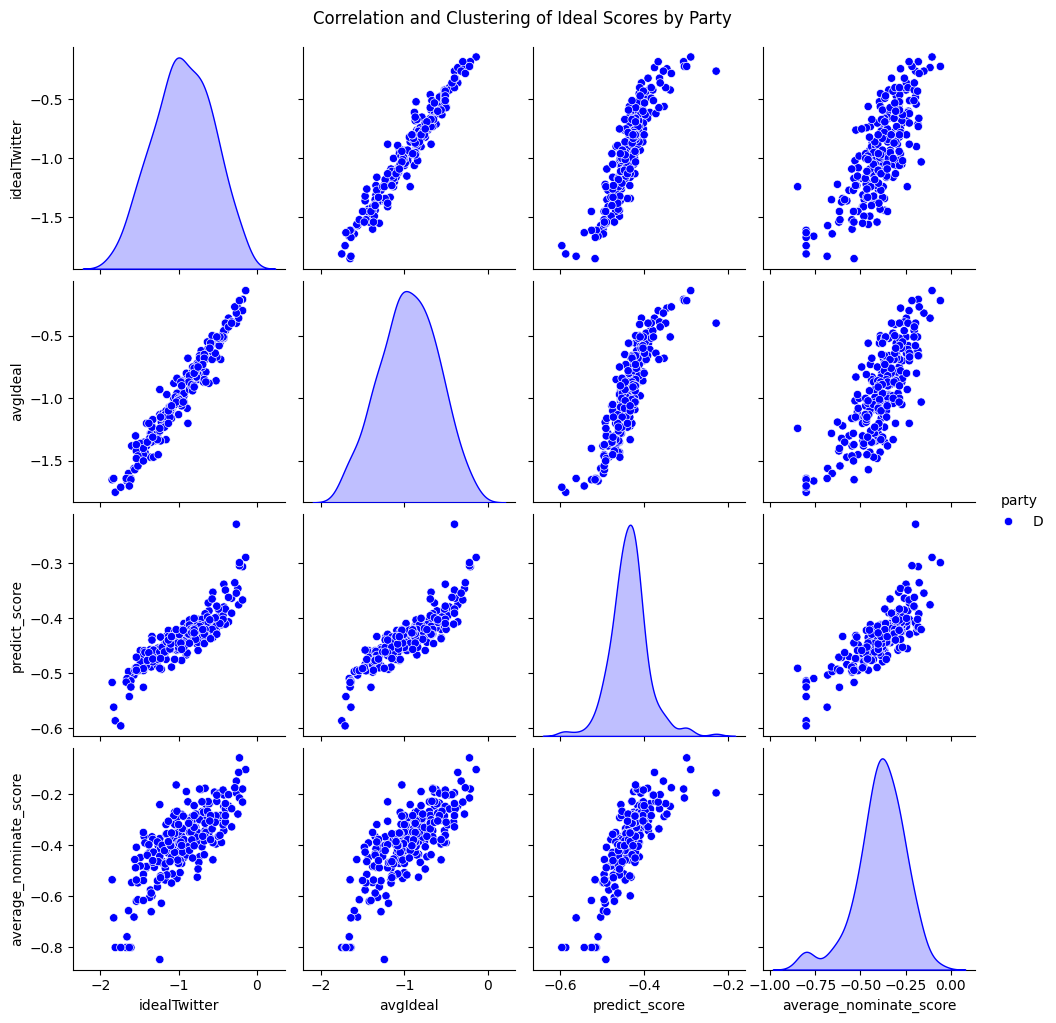

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the dataset is loaded properly
df = df_candidate_scores1

# Define color mapping for parties
party_colors = {"D": "blue", "R": "red"}

# Create a pairplot to visualize correlations and clusters
sns.pairplot(df, vars=["idealTwitter", "avgIdeal", "predict_score", "average_nominate_score"], hue="party", palette=party_colors, diag_kind="kde")

# Set plot title
plt.suptitle("Correlation and Clustering of Ideal Scores by Party", y=1.02)

# Show the plot
plt.show()

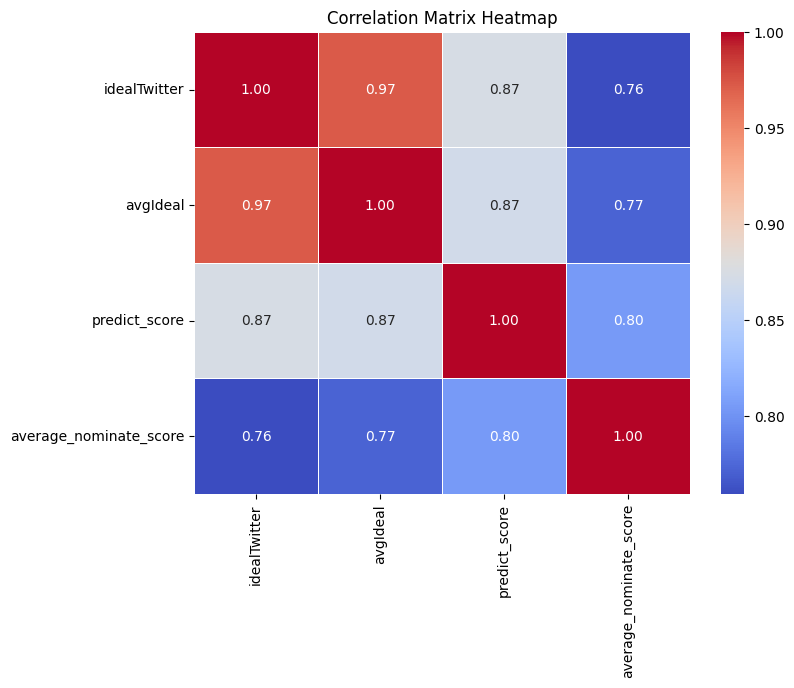

In [24]:
# 2 heatmap, for demo and repub
import matplotlib.pyplot as plt
import seaborn as sns


correlation_matrix = df_candidate_scores1[["idealTwitter", "avgIdeal", "predict_score", "average_nominate_score"]].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()
